# Getting Datasets from Pytorch Geometric

In [81]:
from torch_geometric.datasets import AmazonBook

In [82]:
dataset = AmazonBook(root = './amazonbook')

Processing...
Done!


In [83]:
dataset[0]

HeteroData(
  user={ num_nodes=52643 },
  book={ num_nodes=91599 },
  (user, rates, book)={
    edge_index=[2, 2380730],
    edge_label_index=[2, 603378],
  },
  (book, rated_by, user)={ edge_index=[2, 2380730] }
)

In [84]:
dataset.num_features

{'user': 0, 'book': 0}

In [85]:
# Load the processed data
print(dataset[0])

# Check the node types and number of nodes
print(f"User nodes: {dataset[0]['user'].num_nodes}")
print(f"Book nodes: {dataset[0]['book'].num_nodes}")

HeteroData(
  user={ num_nodes=52643 },
  book={ num_nodes=91599 },
  (user, rates, book)={
    edge_index=[2, 2380730],
    edge_label_index=[2, 603378],
  },
  (book, rated_by, user)={ edge_index=[2, 2380730] }
)
User nodes: 52643
Book nodes: 91599


In [86]:

# Inspect the edge indices (relationship between users and books)
print(f"Edge index (user -> book): \n {dataset[0]['user', 'rates', 'book']['edge_index']}")
print(f"Edge index (book -> user): \n {dataset[0]['book', 'rated_by', 'user']['edge_index']}")


Edge index (user -> book): 
 tensor([[    0,     0,     0,  ..., 52642, 52642, 52642],
        [    0,     1,     2,  ..., 23186, 10690, 10874]])
Edge index (book -> user): 
 tensor([[    0,     1,     2,  ..., 23186, 10690, 10874],
        [    0,     0,     0,  ..., 52642, 52642, 52642]])


In [87]:
data = dataset[0]

In [88]:
print("Node types:", data.node_types)
print("Edge types:", data.edge_types)


Node types: ['user', 'book']
Edge types: [('user', 'rates', 'book'), ('book', 'rated_by', 'user')]


In [89]:
user_to_book_edge_index = data['user', 'rates', 'book']['edge_index']
print('Edge index (user -> book):\n', user_to_book_edge_index)


Edge index (user -> book):
 tensor([[    0,     0,     0,  ..., 52642, 52642, 52642],
        [    0,     1,     2,  ..., 23186, 10690, 10874]])


In [90]:
from torch_geometric.datasets import MovieLens1M

In [91]:
df = MovieLens1M(root = './movielens')

Extracting movielens/ml-1m.zip
Processing...
Done!


In [92]:
movies = df[0]

In [93]:
movies

HeteroData(
  movie={ x=[3883, 18] },
  user={ x=[6040, 30] },
  (user, rates, movie)={
    edge_index=[2, 1000209],
    rating=[1000209],
    time=[1000209],
  },
  (movie, rated_by, user)={
    edge_index=[2, 1000209],
    rating=[1000209],
    time=[1000209],
  }
)

# Taobao Dataset 

In [94]:
from torch_geometric.datasets import Taobao

In [95]:
#first time run the below 
#dataset = Taobao(root='taobao', force_reload=True)
dataset = Taobao(root  = 'taobao')

In [ ]:
taobao = dataset[0]

In [ ]:
taobao.node_types

['user', 'item', 'category']

In [ ]:
taobao.edge_types

[('user', 'to', 'item'), ('item', 'to', 'category')]

In [116]:
taobao['user', 'item'].edge_index

tensor([[      0,       0,       0,  ...,  970447,  970447,  970447],
        [1827766, 1880345, 2076699,  ..., 2939548, 1534057, 2978718]])

In [117]:
taobao['item', 'category'].edge_index

tensor([[1827766, 1880345, 2076699,  ...,  848356,  522299, 2015151],
        [   4564,    4565,     259,  ...,    4637,    4565,    8438]])

# Connecting to Google Big Query 

In [96]:
from google.cloud import bigquery
from google.oauth2 import service_account

In [97]:
key_path = "cpsc483-49e73bf4d565.json"
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials=credentials, project=credentials.project_id)


In [98]:
dataset_id = "final_project"
table_id = "taobao"

In [99]:
table_ref = client.dataset(dataset_id).table(table_id)

In [100]:
table = client.get_table(table_ref)

In [101]:
query = "Select * from cpsc483.final_project.taobao limit 10000"

In [102]:
query_job = client.query(query)  # Make an API request to execute the query

In [103]:
df = query_job.to_dataframe() 

/opt/anaconda3/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [104]:
df

,userId,itemId,categoryId,behaviorType,timestamp
0,580045,4664713,721664,pv,1512276886
1,832241,808112,721664,pv,1512282159
2,575635,854934,721664,pv,1511710445
3,805537,1217839,721664,pv,1512287749
4,904909,3211819,721664,pv,1511705511
...,...,...,...,...,...
9995,299908,2608238,4244487,pv,1512227359
9996,746029,4897873,4244487,pv,1512138805
9997,952799,261976,4244487,pv,1511628515
9998,551540,3379970,4244487,pv,1512122057


# Node Degree Distribution 

Out-Degree for Users: Number of items each user has interacted with.

In-Degree for Items (from Users): Number of users who have interacted with each item.

Out-Degree for Items: Number of categories each item belongs to.

In-Degree for Categories: Number of items in each category.


In [105]:
outdegreeUsersQ = """
SELECT userId, COUNT(DISTINCT itemId) AS out_degree
FROM cpsc483.final_project.taobao
GROUP BY userId;
"""

In [106]:
query_job = client.query(outdegreeUsersQ) 
outdegreeUsers = query_job.to_dataframe() 

/opt/anaconda3/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [107]:
outdegreeUsers.shape

(987994, 2)

In [108]:
outdegreeUsers.sort_values(by = 'out_degree', ascending = False)

,userId,out_degree
108371,435009,710
297571,208813,699
256158,503757,698
105645,419460,687
239005,54206,681
...,...,...
294793,489899,1
179696,195014,1
65176,190075,1
294601,350058,1


In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
np.mean(outdegreeUsers['out_degree'])

76.89281412640157

In [111]:
np.median(outdegreeUsers['out_degree'])

58.0

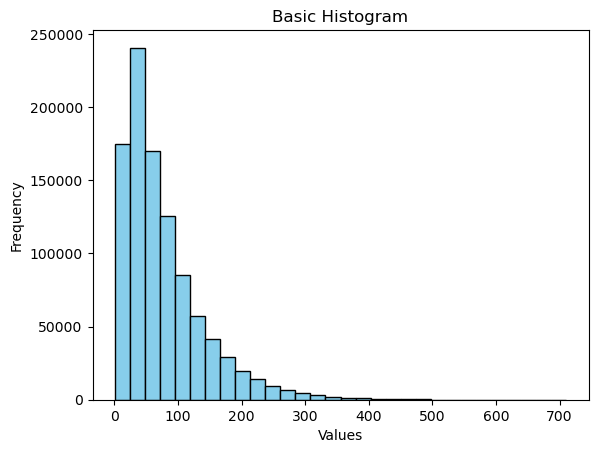

In [112]:
plt.hist(outdegreeUsers['out_degree'], bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [ ]:
# Edge index between users and items
user_item_edge_index = dataset[].edge_index
print('User-Item Edge Index shape:', user_item_edge_index.shape)

# Edge index between items and categories
item_category_edge_index = data['item', 'category'].edge_index
print('Item-Category Edge Index shape:', item_category_edge_index.shape)
